<a href="https://colab.research.google.com/github/pajonnakuti/pyDataviz/blob/main/Read_ARGO_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
!pip install cartopy

In [128]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [129]:
# === Open ARGO profile NetCDF file ===
file = "/content/drive/MyDrive/PyDataViz/2902257_prof.nc"   # replace with your ARGO file
ds = xr.open_dataset(file)

In [130]:
# === Display info ===
print("\n=== Dimensions ===")
print(ds.dims)

print("\n=== Variables ===")
print(list(ds.variables))

print("\n=== Dataset Info ===")
print(ds)



=== Dimensions ===
FrozenMappingWarningOnValuesAccess({'N_PROF': 188, 'N_PARAM': 3, 'N_LEVELS': 339, 'N_CALIB': 1, 'N_HISTORY': 0})

=== Variables ===
['DATA_TYPE', 'FORMAT_VERSION', 'HANDBOOK_VERSION', 'REFERENCE_DATE_TIME', 'DATE_CREATION', 'DATE_UPDATE', 'PLATFORM_NUMBER', 'PROJECT_NAME', 'PI_NAME', 'STATION_PARAMETERS', 'CYCLE_NUMBER', 'DIRECTION', 'DATA_CENTRE', 'DC_REFERENCE', 'DATA_STATE_INDICATOR', 'DATA_MODE', 'PLATFORM_TYPE', 'FLOAT_SERIAL_NO', 'FIRMWARE_VERSION', 'WMO_INST_TYPE', 'JULD', 'JULD_QC', 'JULD_LOCATION', 'LATITUDE', 'LONGITUDE', 'POSITION_QC', 'POSITIONING_SYSTEM', 'PROFILE_PRES_QC', 'PROFILE_TEMP_QC', 'PROFILE_PSAL_QC', 'VERTICAL_SAMPLING_SCHEME', 'CONFIG_MISSION_NUMBER', 'PRES', 'PRES_QC', 'PRES_ADJUSTED', 'PRES_ADJUSTED_QC', 'PRES_ADJUSTED_ERROR', 'TEMP', 'TEMP_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_QC', 'TEMP_ADJUSTED_ERROR', 'PSAL', 'PSAL_QC', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_QC', 'PSAL_ADJUSTED_ERROR', 'PARAMETER', 'SCIENTIFIC_CALIB_EQUATION', 'SCIENTIFIC_CALI

In [131]:
# === Choose adjusted variables if available ===
def get_var(ds, base_name):
    if base_name + "_ADJUSTED" in ds.variables:
        return ds[base_name + "_ADJUSTED"].values
    else:
        return ds[base_name].values


In [132]:
# === Extract key variables (variable names may vary slightly) ===
lat = ds["LATITUDE"].values
lon = ds["LONGITUDE"].values
pres = get_var(ds, "PRES")
temp = get_var(ds, "TEMP")
psal = get_var(ds, "PSAL")


In [133]:
# Handle fill values
temp = np.ma.masked_invalid(temp)
psal = np.ma.masked_invalid(psal)
pres = np.ma.masked_invalid(pres)

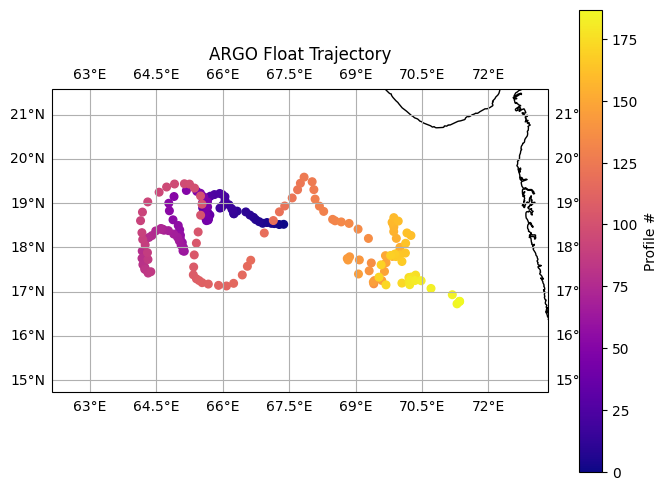

In [134]:
# === Plot: Float trajectory on map ===
plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon.min()-2, lon.max()+2, lat.min()-2, lat.max()+2], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.gridlines(draw_labels=True)

sc = ax.scatter(lon, lat, c=np.arange(len(lon)), cmap="plasma", marker="o", s=30, transform=ccrs.PlateCarree())
plt.colorbar(sc, ax=ax, label="Profile #")
plt.title("ARGO Float Trajectory")
plt.show()

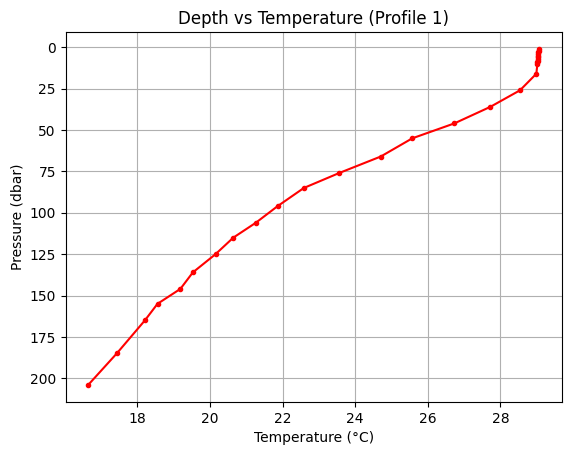

In [135]:
# === Plot: Depth vs Temperature for first profile ===
plt.figure()
plt.plot(temp[77,:], pres[77,:], 'r.-')
plt.gca().invert_yaxis()
plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (dbar)")
plt.title("Depth vs Temperature (Profile 1)")
plt.grid(True)
plt.show()

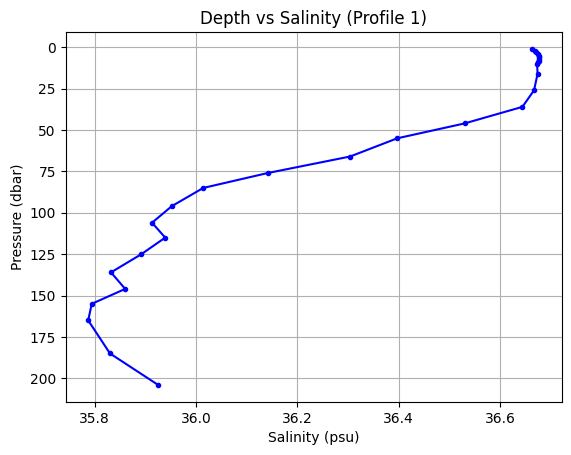

In [136]:
# === Plot: Depth vs Salinity for first profile ===
plt.figure()
plt.plot(psal[77,:], pres[77,:], 'b.-')
plt.gca().invert_yaxis()
plt.xlabel("Salinity (psu)")
plt.ylabel("Pressure (dbar)")
plt.title("Depth vs Salinity (Profile 1)")
plt.grid(True)
plt.show()

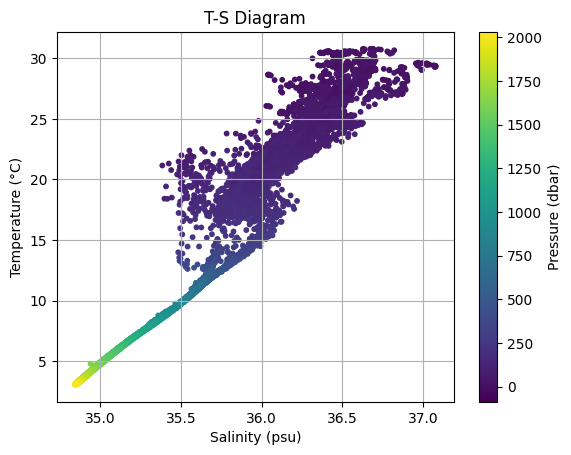

In [137]:
# === Plot: Temperature vs Salinity (T-S Diagram, all profiles) ===
plt.figure()
plt.scatter(psal,temp, c=pres, cmap="viridis", s=10)
plt.xlabel("Salinity (psu)")
plt.ylabel("Temperature (°C)")
plt.title("T-S Diagram")
plt.colorbar(label="Pressure (dbar)")
plt.grid(True)
plt.show()

In [138]:
print(temp.shape)
np.arange(temp.shape[0])


(188, 339)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

/tmp/ipython-input-964529369.py:11: RuntimeWarning: Mean of empty slice
  depth = np.nanmean(pres, axis=0)   # shape = (339,)
/tmp/ipython-input-964529369.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(profiles, depth, temp.T, cmap="RdYlBu_r", shading="auto")


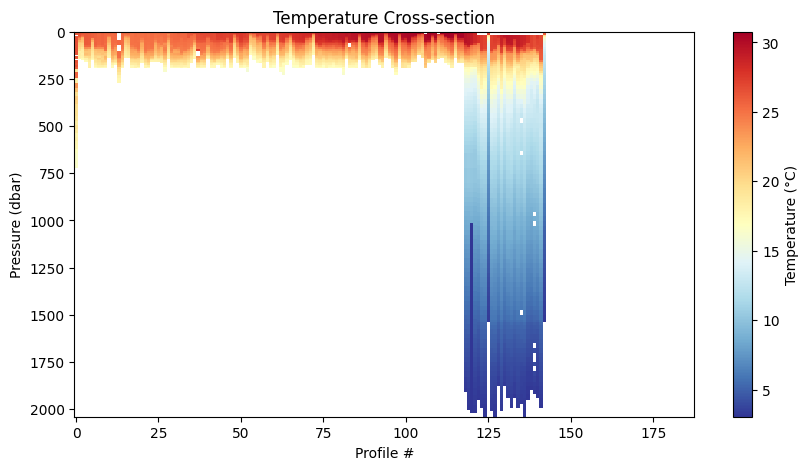

/tmp/ipython-input-964529369.py:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(profiles, depth, psal.T, cmap="viridis", shading="auto")


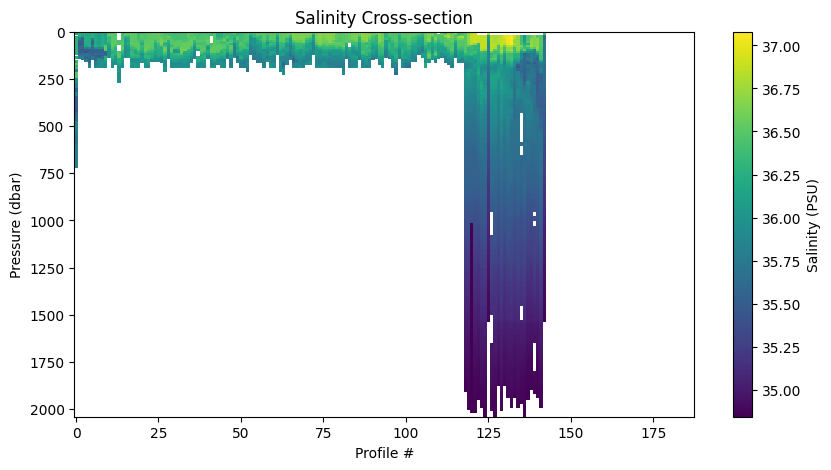

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Assume temp, psal, pres already loaded
# Replace masked values with NaN
temp = np.array(temp.filled(np.nan)) if np.ma.isMaskedArray(temp) else np.array(temp)
psal = np.array(psal.filled(np.nan)) if np.ma.isMaskedArray(psal) else np.array(psal)
pres = np.array(pres.filled(np.nan)) if np.ma.isMaskedArray(pres) else np.array(pres)

# Compute mean depth (ignore NaNs)
depth = np.nanmean(pres, axis=0)   # shape = (339,)

# Ensure depth has no NaNs (drop levels where all profiles are NaN)
valid = np.isfinite(depth)
depth = depth[valid]
temp = temp[:, valid]
psal = psal[:, valid]

profiles = np.arange(temp.shape[0])  # 188 profiles

# === Temperature Cross-section ===
plt.figure(figsize=(10, 5))
plt.pcolormesh(profiles, depth, temp.T, cmap="RdYlBu_r", shading="auto")
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.ylabel("Pressure (dbar)")
plt.title("Temperature Cross-section")
plt.colorbar(label="Temperature (°C)")
plt.show()

# === Salinity Cross-section ===
plt.figure(figsize=(10, 5))
plt.pcolormesh(profiles, depth, psal.T, cmap="viridis", shading="auto")
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.ylabel("Pressure (dbar)")
plt.title("Salinity Cross-section")
plt.colorbar(label="Salinity (PSU)")
plt.show()


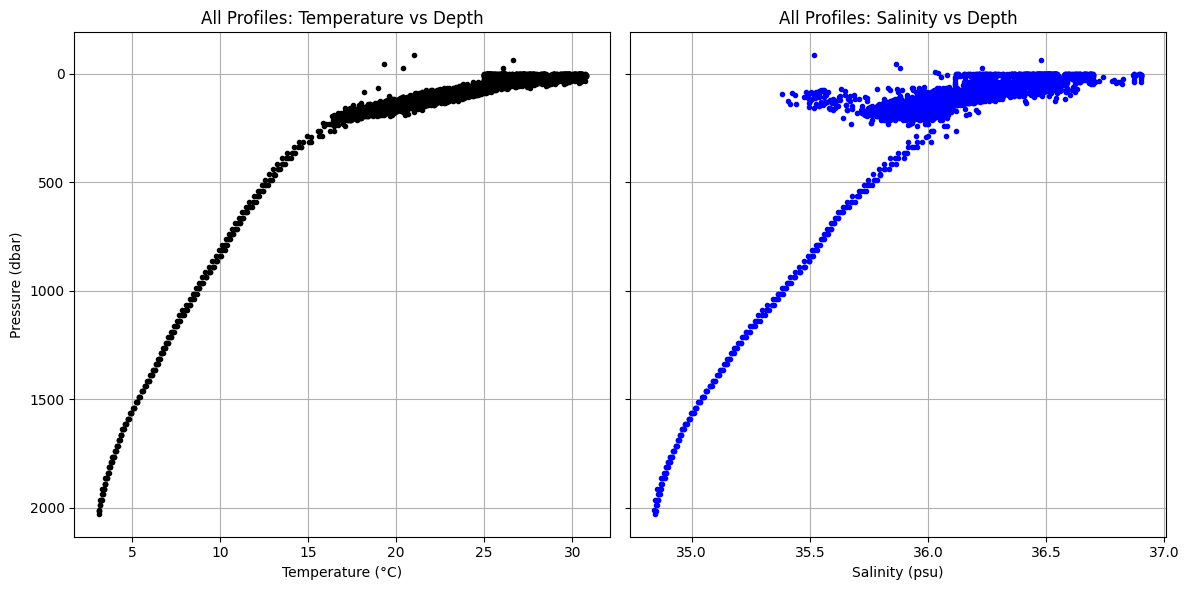

In [140]:
# === Plot all profiles: Temp & Salinity vs Depth ===
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Temperature subplot
for i in range(temp.shape[1]):
    axes[0].plot(temp[:, i], pres[:, i], 'k.', lw=1)
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Pressure (dbar)")
axes[0].set_title("All Profiles: Temperature vs Depth")
axes[0].grid(True)
axes[0].invert_yaxis()  # reverse y-axis

# Salinity subplot
for i in range(psal.shape[1]):
    axes[1].plot(psal[:, i], pres[:, i], 'b.', lw=1)
axes[1].set_xlabel("Salinity (psu)")
axes[1].set_title("All Profiles: Salinity vs Depth")
axes[1].grid(True)
#axes[1].invert_yaxis()  # reverse y-axis

plt.tight_layout()
plt.show()


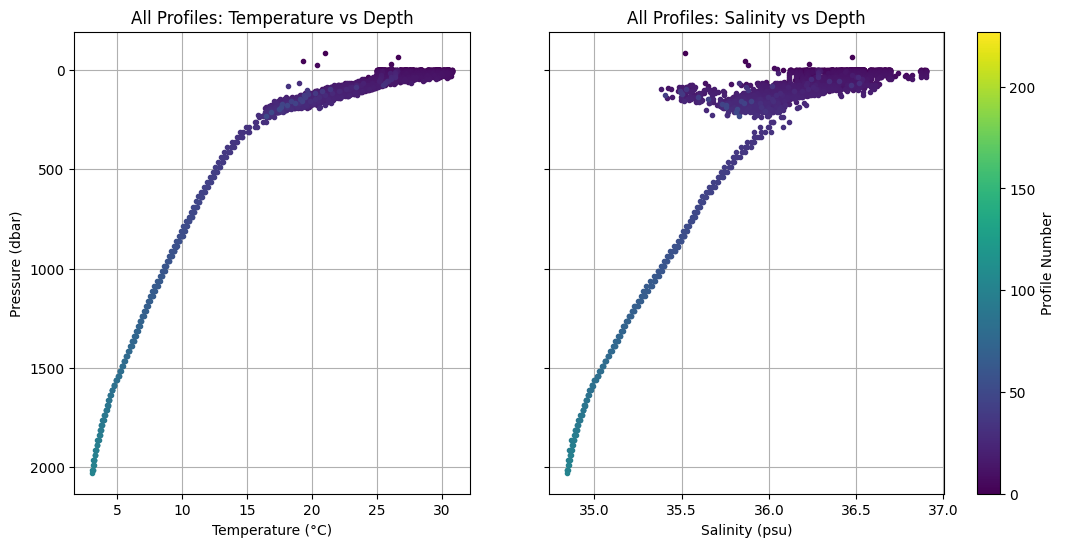

In [141]:
import matplotlib.cm as cm
n_profiles = temp.shape[1]

# === Set up colormap ===
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, n_profiles))

# === Plot all profiles with profile number colorbar ===
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Temperature subplot
for i in range(n_profiles):
    axes[0].plot(temp[:, i], pres[:, i],'.', color=colors[i], lw=1)
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Pressure (dbar)")
axes[0].set_title("All Profiles: Temperature vs Depth")
axes[0].grid(True)
axes[0].invert_yaxis()

# Salinity subplot
for i in range(n_profiles):
    axes[1].plot(psal[:, i], pres[:, i], '.', color=colors[i], lw=1)
axes[1].set_xlabel("Salinity (psu)")
axes[1].set_title("All Profiles: Salinity vs Depth")
axes[1].grid(True)
#axes[1].invert_yaxis()


# Add colorbar to the right, outside plots
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=n_profiles-1))
cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.03, pad=0.1)
cbar.set_label("Profile Number")

# Adjust layout so colorbar fits neatly
plt.subplots_adjust(right=0.85)

plt.show()


# Add shared colorbar for profile numbers
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=n_profiles-1))
#cbar = fig.colorbar(sm, ax=axes, orientation="vertical", location="right",fraction=0.03, pad=0.04)
#cbar.set_label("Profile Number")

#plt.tight_layout()
#plt.show()